# WeatherPy
----

#### Author: Joey Picca

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
lat, temp, humidity, cloud, wind = [],[],[],[],[]

base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

print('Beginning data retrieval')
print('------------------------')

for idx,city in enumerate(cities):

    city = city

    url = f'{base_url}q={city}&units={units}&APPID={weather_api_key}'

    try:
        response = requests.get(url)

        lat.append(response.json()['coord']['lat'])
        temp.append(response.json()['main']['temp'])
        humidity.append(response.json()['main']['humidity'])
        cloud.append(response.json()['clouds']['all'])
        wind.append(response.json()['wind']['speed'])

        print(f'Gathered weather data for City #{idx+1}: {city}')
    except:
        print('City not found! Stop looking in the boonies!')


Beginning data retrieval
------------------------
Gathered weather data for City #1: new norfolk
Gathered weather data for City #2: cherskiy
Gathered weather data for City #3: yellowknife
Gathered weather data for City #4: santiago
Gathered weather data for City #5: ribeira grande
Gathered weather data for City #6: merrill
City not found! Stop looking in the boonies!
Gathered weather data for City #8: rikitea
Gathered weather data for City #9: avarua
Gathered weather data for City #10: bredasdorp
Gathered weather data for City #11: svetlaya
Gathered weather data for City #12: natal
City not found! Stop looking in the boonies!
Gathered weather data for City #14: batagay-alyta
Gathered weather data for City #15: itacoatiara
City not found! Stop looking in the boonies!
Gathered weather data for City #17: punta arenas
Gathered weather data for City #18: saint-philippe
Gathered weather data for City #19: lasa
Gathered weather data for City #20: vila franca do campo
Gathered weather data for

Gathered weather data for City #180: kaitangata
City not found! Stop looking in the boonies!
Gathered weather data for City #182: coruripe
Gathered weather data for City #183: huarmey
Gathered weather data for City #184: jurm
Gathered weather data for City #185: mahebourg
Gathered weather data for City #186: talnakh
Gathered weather data for City #187: makakilo city
Gathered weather data for City #188: tombouctou
Gathered weather data for City #189: evensk
Gathered weather data for City #190: high level
Gathered weather data for City #191: hasaki
Gathered weather data for City #192: qaanaaq
Gathered weather data for City #193: chokurdakh
Gathered weather data for City #194: bangassou
Gathered weather data for City #195: sao miguel do araguaia
Gathered weather data for City #196: asau
Gathered weather data for City #197: kidal
Gathered weather data for City #198: jalu
Gathered weather data for City #199: bengkulu
Gathered weather data for City #200: bandarbeyla
City not found! Stop look

Gathered weather data for City #359: bontang
Gathered weather data for City #360: prieska
Gathered weather data for City #361: oranjemund
Gathered weather data for City #362: shintomi
Gathered weather data for City #363: nishihara
Gathered weather data for City #364: atasu
Gathered weather data for City #365: saint-louis
Gathered weather data for City #366: oytal
Gathered weather data for City #367: wageningen
City not found! Stop looking in the boonies!
Gathered weather data for City #369: adrar
Gathered weather data for City #370: miri
City not found! Stop looking in the boonies!
Gathered weather data for City #372: kyaikkami
Gathered weather data for City #373: grand gaube
Gathered weather data for City #374: lagoa
Gathered weather data for City #375: maltahohe
Gathered weather data for City #376: petrovsk
Gathered weather data for City #377: buckingham
Gathered weather data for City #378: san cristobal
City not found! Stop looking in the boonies!
Gathered weather data for City #380

Gathered weather data for City #537: zeya
Gathered weather data for City #538: dongsheng
Gathered weather data for City #539: mitsamiouli
Gathered weather data for City #540: sayyan
Gathered weather data for City #541: wana
Gathered weather data for City #542: saint-leu
Gathered weather data for City #543: dalianwan
Gathered weather data for City #544: belen
Gathered weather data for City #545: marsa matruh
Gathered weather data for City #546: maracas
Gathered weather data for City #547: bereda
Gathered weather data for City #548: baiyin
Gathered weather data for City #549: tiruchchendur
Gathered weather data for City #550: inongo
Gathered weather data for City #551: itoman
Gathered weather data for City #552: kontagora
Gathered weather data for City #553: tuatapere
Gathered weather data for City #554: chapais
Gathered weather data for City #555: taltal
Gathered weather data for City #556: mamakan
Gathered weather data for City #557: takoradi
Gathered weather data for City #558: iisalm

In [23]:
weatherDF = pd.DataFrame({'lat(deg)':lat,'temp(f)':temp,'humidity(%)':humidity,'cloudcover(%)':cloud,'wind(mph)':wind})

In [30]:
weatherDF.to_csv('../output_data/wxdata.csv',index=False)

In [41]:
dict(xlim = [-90,90])

{'xlim': [-90, 90]}

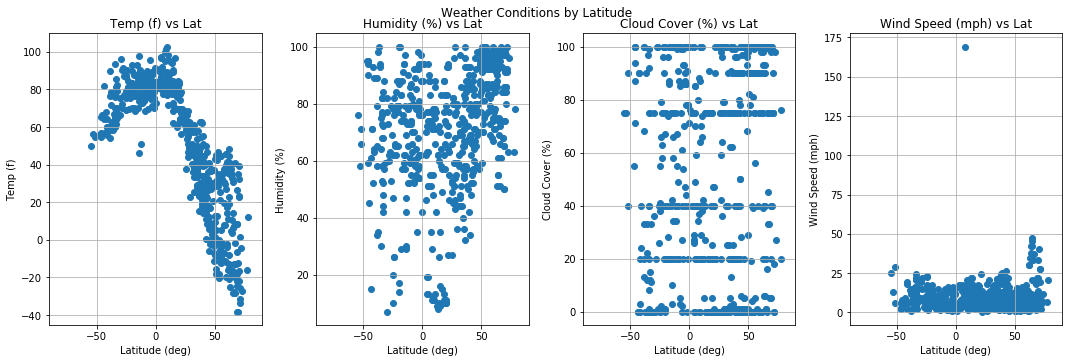

In [72]:
plt.rcParams['axes.grid'] = True
fig, axs = plt.subplots(1, 4, figsize=(15, 5), subplot_kw=dict(xlim=[-90,90], xlabel='Latitude (deg)'))

axs[0].scatter(weatherDF['lat(deg)'],weatherDF['temp(f)'])
axs[0].set_title('Temp (f) vs Lat')
axs[0].set_ylabel('Temp (f)')
axs[0].set_xlabel('Latitude (deg)')
#axs[0].grid()

axs[1].scatter(weatherDF['lat(deg)'],weatherDF['humidity(%)'])
axs[1].set_title('Humidity (%) vs Lat')
axs[1].set_ylabel('Humidity (%)')

axs[2].scatter(weatherDF['lat(deg)'],weatherDF['cloudcover(%)'])
axs[2].set_title('Cloud Cover (%) vs Lat')
axs[2].set_ylabel('Cloud Cover (%)')

axs[3].scatter(weatherDF['lat(deg)'],weatherDF['wind(mph)'])
axs[3].set_title('Wind Speed (mph) vs Lat')
axs[3].set_ylabel('Wind Speed (mph)')

fig.suptitle('Weather Conditions by Latitude',y=1)
plt.tight_layout()
plt.savefig('../output_data/WxByLat.png',dpi=300)
plt.show()

# Linear Regression

Create a plotting function since we have to make a lot of scatterplots with linear regression appended

In [129]:
def plotter(x,y,title,xlab,ylab,eqnPt,xlim,ylim):
    
    cc = st.pearsonr(x,y)[0]
    
    fig,ax = plt.subplots(figsize=(8,5))
    plt.scatter(x,y)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.xlim(xlim)
    plt.ylim(ylim)
    
    # Get regression data
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
    regress_values = x * slope + intercept
    
    ax.plot(x,regress_values,"k-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,eqnPt,fontsize=15,color="black")
    plt.show()
    
    return fig, cc

## Temperature vs Latitude
#### Northern Hemisphere

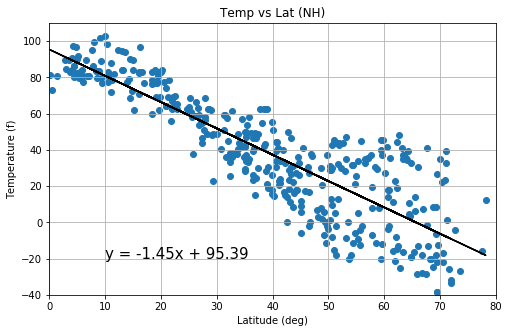

The calculated correlation coefficient: -0.860579489642344


In [130]:
df = weatherDF[['lat(deg)','temp(f)']]
df = df[df['lat(deg)'] > 0]

fig, cc = plotter(df['lat(deg)'],df['temp(f)'],'Temp vs Lat (NH)','Latitude (deg)','Temperature (f)',
              (10,-20),[0,80],[-40,110])

print(f'The calculated correlation coefficient: {cc}')

fig.savefig('../output_data/tempNH.png',dpi=300)

#### Southern Hemisphere

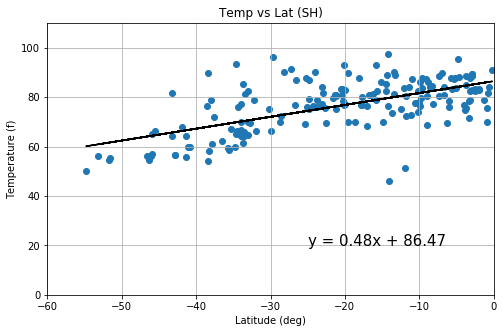

The calculated correlation coefficient: 0.6222055942990001


In [131]:
df = weatherDF[['lat(deg)','temp(f)']]
df = df[df['lat(deg)'] < 0]

fig, cc = plotter(df['lat(deg)'],df['temp(f)'],'Temp vs Lat (SH)','Latitude (deg)','Temperature (f)',(-25,20),
              [-60,0],[0,110])

print(f'The calculated correlation coefficient: {cc}')

fig.savefig('../output_data/tempSH.png',dpi=300)

## Humidity vs Latitude
#### Northern Hemisphere

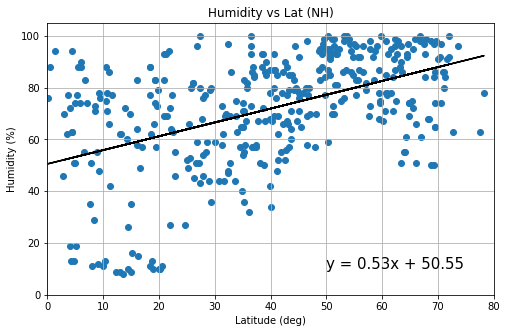

The calculated correlation coefficient: 0.48359942823342134


In [132]:
df = weatherDF[['lat(deg)','humidity(%)']]
df = df[df['lat(deg)'] > 0]

fig, cc = plotter(df['lat(deg)'],df['humidity(%)'],'Humidity vs Lat (NH)','Latitude (deg)','Humidity (%)',(50,10),
             [0,80],[0,105])

print(f'The calculated correlation coefficient: {cc}')

fig.savefig('../output_data/humNH.png',dpi=300)

#### Southern Hemisphere

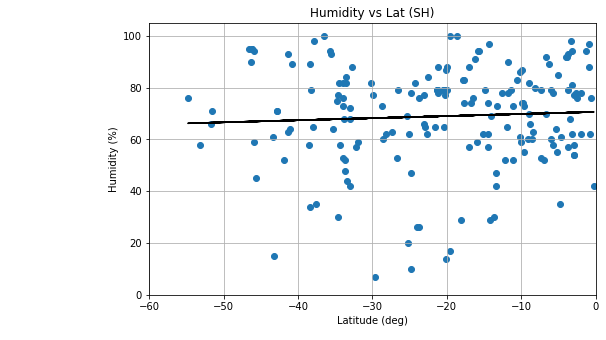

The calculated correlation coefficient: 0.05728264466186398


In [133]:
df = weatherDF[['lat(deg)','humidity(%)']]
df = df[df['lat(deg)'] < 0]

fig, cc = plotter(df['lat(deg)'],df['humidity(%)'],'Humidity vs Lat (SH)','Latitude (deg)','Humidity (%)',(-70,10),
             [-60,0],[0,105])

print(f'The calculated correlation coefficient: {cc}')

fig.savefig('../output_data/humSH.png',dpi=300)

## Cloud Cover vs Latitude
#### Northern Hemisphere

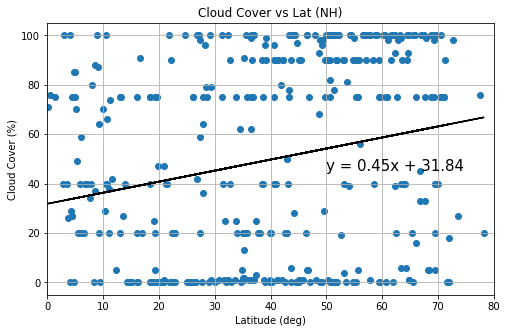

The calculated correlation coefficient: 0.22446066843014228


In [134]:
df = weatherDF[['lat(deg)','cloudcover(%)']]
df = df[df['lat(deg)'] > 0]

fig, cc = plotter(df['lat(deg)'],df['cloudcover(%)'],'Cloud Cover vs Lat (NH)','Latitude (deg)','Cloud Cover (%)',(50,45),
             [0,80],[-5,105])

print(f'The calculated correlation coefficient: {cc}')

fig.savefig('../output_data/cloudNH.png',dpi=300)

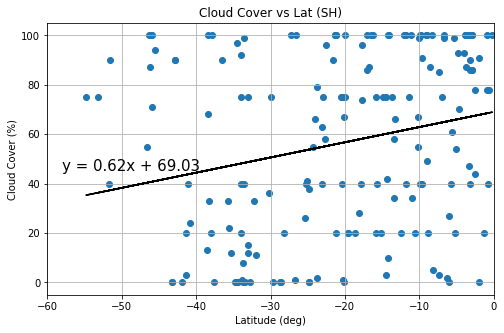

The calculated correlation coefficient: 0.2321015150566477


In [135]:
df = weatherDF[['lat(deg)','cloudcover(%)']]
df = df[df['lat(deg)'] < 0]

fig, cc = plotter(df['lat(deg)'],df['cloudcover(%)'],'Cloud Cover vs Lat (SH)','Latitude (deg)','Cloud Cover (%)',(-58,45),
             [-60,0],[-5,105])

print(f'The calculated correlation coefficient: {cc}')

fig.savefig('../output_data/cloudSH.png',dpi=300)

## Wind Speed vs Latitude
#### Northern Hemisphere

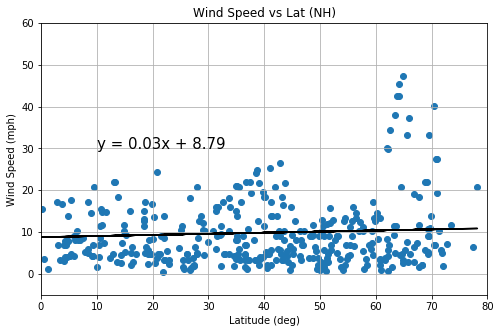

The calculated correlation coefficient: 0.04648872446132504


In [138]:
df = weatherDF[['lat(deg)','wind(mph)']]
df = df[df['lat(deg)'] > 0]

fig, cc = plotter(df['lat(deg)'],df['wind(mph)'],'Wind Speed vs Lat (NH)','Latitude (deg)','Wind Speed (mph)',(10,30),
             [0,80],[-5, 60])

print(f'The calculated correlation coefficient: {cc}')

fig.savefig('../output_data/windNH.png',dpi=300)

#### Southern Hemisphere

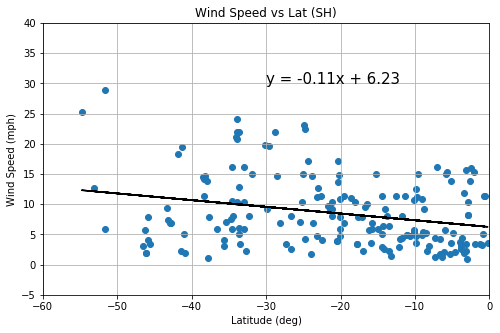

The calculated correlation coefficient: -0.2659204482762053


In [140]:
df = weatherDF[['lat(deg)','wind(mph)']]
df = df[df['lat(deg)'] < 0]

fig, cc = plotter(df['lat(deg)'],df['wind(mph)'],'Wind Speed vs Lat (SH)','Latitude (deg)','Wind Speed (mph)',(-30,30),
             [-60,0],[-5, 40])

print(f'The calculated correlation coefficient: {cc}')

fig.savefig('../output_data/windSH.png',dpi=300)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | darhan
Processing Record 3 of Set 1 | tarakan
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | jiuquan
Processing Record 7 of Set 1 | sesheke
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | clarence town
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | magadan
Processing Record 12 of Set 1 | salym
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | arys
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | rio gallegos
Processing Record 22 of Set 1 | kropotkin
Processing Record 23 of Set 1 | but

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

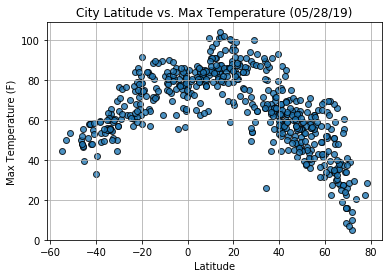

#### Latitude vs. Humidity Plot

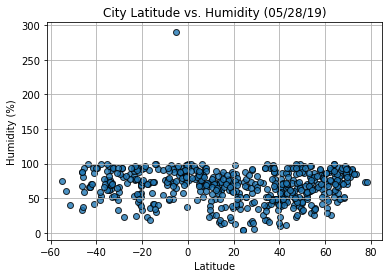

#### Latitude vs. Cloudiness Plot

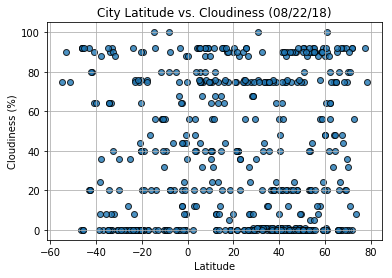

#### Latitude vs. Wind Speed Plot

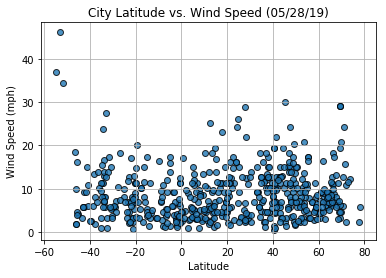

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


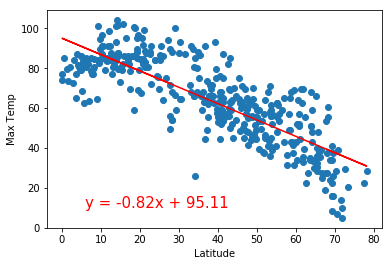

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


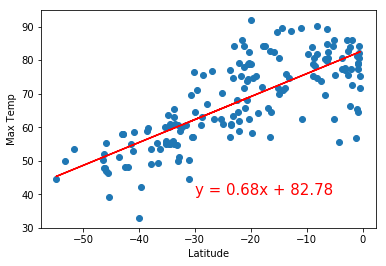

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


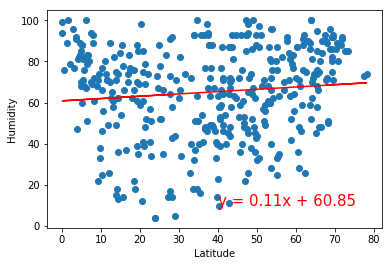

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


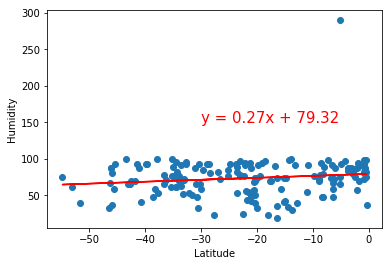

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


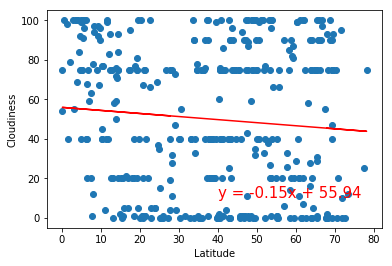

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


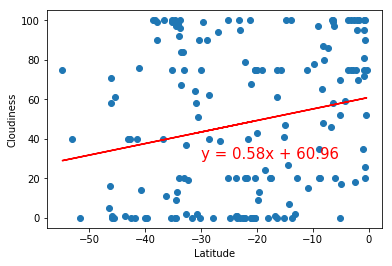

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


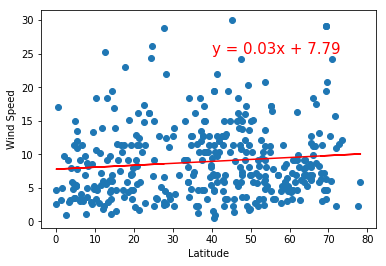

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


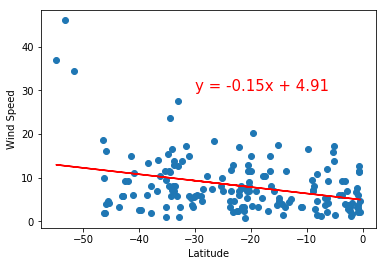